In [35]:
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

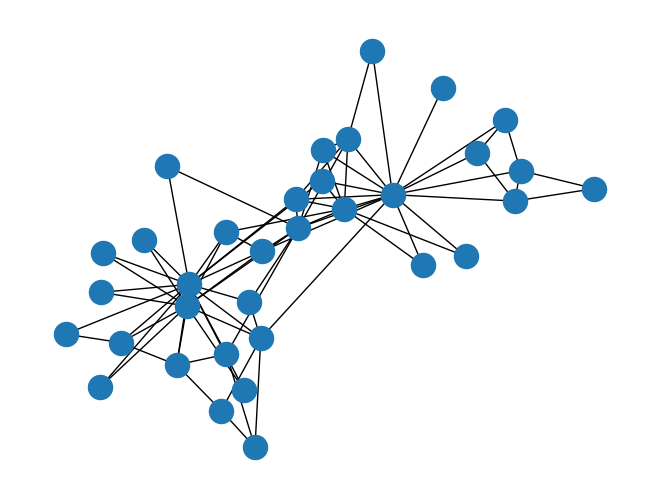

In [36]:
g = nx.karate_club_graph()
nx.draw(g)

In [37]:
M = nx.adjacency_matrix(g).todense()
M

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [38]:
km = KMeans(2)
res = km.fit_predict(M)

/home/gmas/miniconda3/envs/Gus_1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
reszero = np.where(res==0)[0].tolist()
resone = np.where(res==1)[0].tolist()

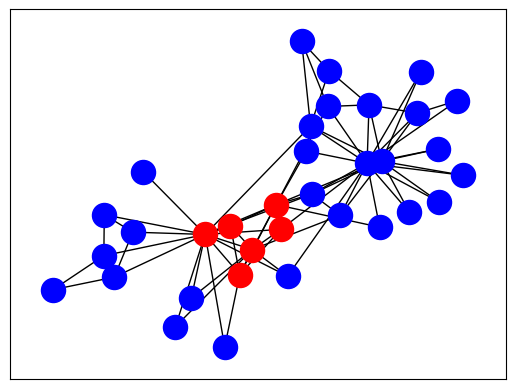

In [40]:
pos = nx.spring_layout(g, seed=123)
nx.draw_networkx_nodes(g, pos = pos, nodelist=reszero, node_color="blue")
nx.draw_networkx_nodes(g, pos = pos, nodelist=resone, node_color="red")
nx.draw_networkx_edges(g, pos = pos)

## Graph laplacian

In [41]:
M = nx.laplacian_matrix(g).todense()
M

array([[42, -4, -5, ..., -2,  0,  0],
       [-4, 29, -6, ...,  0,  0,  0],
       [-5, -6, 33, ...,  0, -2,  0],
       ...,
       [-2,  0,  0, ..., 21, -4, -4],
       [ 0,  0, -2, ..., -4, 38, -5],
       [ 0,  0,  0, ..., -4, -5, 48]])

In [42]:
km = KMeans(2)
res = km.fit_predict(M)

/home/gmas/miniconda3/envs/Gus_1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
reszero = np.where(res==0)[0].tolist()
resone = np.where(res==1)[0].tolist()

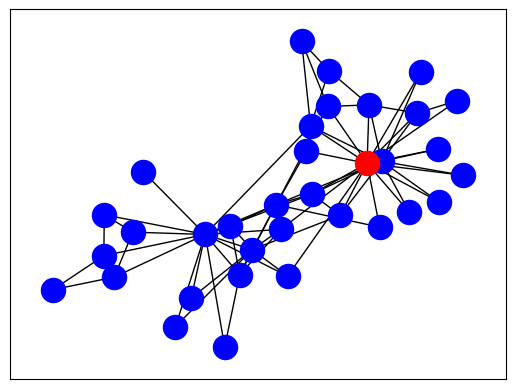

In [44]:
pos = nx.spring_layout(g, seed=123)
nx.draw_networkx_nodes(g, pos = pos, nodelist=reszero, node_color="blue")
nx.draw_networkx_nodes(g, pos = pos, nodelist=resone, node_color="red")
nx.draw_networkx_edges(g, pos = pos)

## On a single metric

In [45]:
df = pd.DataFrame({"nodes":nx.eigenvector_centrality(g).keys(), "values":nx.eigenvector_centrality(g).values()}).set_index("nodes")
df

,values
nodes,
0,0.355483
1,0.265954
2,0.317189
3,0.211174
4,0.075966
5,0.079481
6,0.079481
7,0.170955
8,0.227405


In [46]:
res = km.fit_predict(df)

/home/gmas/miniconda3/envs/Gus_1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
reszero = np.where(res==0)[0].tolist()
resone = np.where(res==1)[0].tolist()

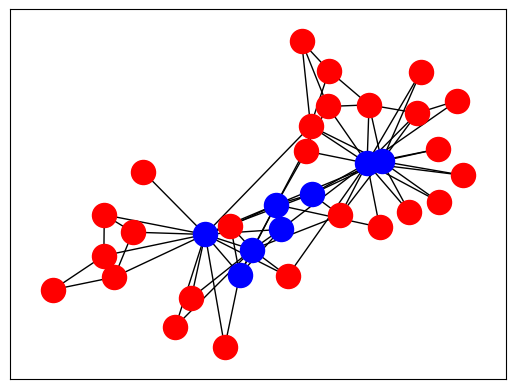

In [48]:
pos = nx.spring_layout(g, seed=123)
nx.draw_networkx_nodes(g, pos = pos, nodelist=reszero, node_color="blue")
nx.draw_networkx_nodes(g, pos = pos, nodelist=resone, node_color="red")
nx.draw_networkx_edges(g, pos = pos)

## On multiple features

In [49]:
df = pd.DataFrame({"nodes":nx.eigenvector_centrality(g).keys(), 
                   "eig":nx.eigenvector_centrality(g).values(),
                  "deg":nx.degree_centrality(g).values(),
                  "close":nx.closeness_centrality(g).values(),
                  "between":nx.betweenness_centrality(g).values()}).set_index("nodes")
df

,eig,deg,close,between
nodes,,,,
0,0.355483,0.484848,0.568966,0.437635
1,0.265954,0.272727,0.485294,0.053937
2,0.317189,0.303030,0.559322,0.143657
3,0.211174,0.181818,0.464789,0.011909
4,0.075966,0.090909,0.379310,0.000631
5,0.079481,0.121212,0.383721,0.029987
6,0.079481,0.121212,0.383721,0.029987
7,0.170955,0.121212,0.440000,0.000000
8,0.227405,0.151515,0.515625,0.055927


In [50]:
res = km.fit_predict(df)

/home/gmas/miniconda3/envs/Gus_1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
reszero = np.where(res==0)[0].tolist()
resone = np.where(res==1)[0].tolist()

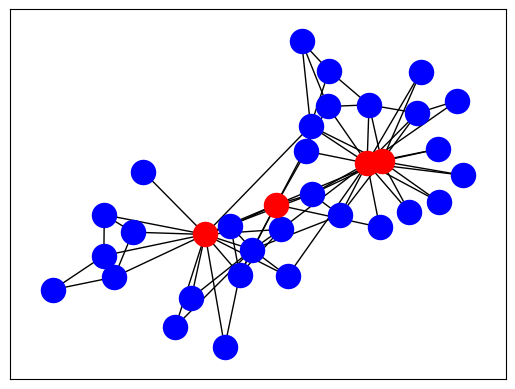

In [52]:
pos = nx.spring_layout(g, seed=123)
nx.draw_networkx_nodes(g, pos = pos, nodelist=reszero, node_color="blue")
nx.draw_networkx_nodes(g, pos = pos, nodelist=resone, node_color="red")
nx.draw_networkx_edges(g, pos = pos)

## Node 2 vec embeddings

In [53]:
from karateclub import node2vec

In [54]:
nv = node2vec.Node2Vec(dimensions=3)

In [55]:
nv.fit(g)

In [56]:
emb = nv.get_embedding()
emb

array([[-0.5613709 ,  1.1887845 ,  1.7162691 ],
       [-0.17616299,  1.3170712 ,  0.8263571 ],
       [ 0.10860707,  1.0330671 ,  0.9240975 ],
       [-0.1432991 ,  0.9647083 ,  1.1314596 ],
       [-0.7616029 ,  1.2791358 ,  2.8403563 ],
       [-0.84571874,  1.0941867 ,  2.9147034 ],
       [-0.87908334,  1.5595007 ,  2.64112   ],
       [ 0.03388616,  0.97552073,  0.9044018 ],
       [ 0.36848602,  1.176526  , -0.29167494],
       [ 0.9656886 ,  1.146978  , -0.421078  ],
       [-0.7927422 ,  1.221867  ,  2.655568  ],
       [-2.0818145 ,  2.1144476 ,  1.5940648 ],
       [-0.2790717 ,  0.8340176 ,  1.6750814 ],
       [ 0.08170237,  1.0100479 ,  0.8498261 ],
       [ 0.45884204,  1.9400672 , -1.7778084 ],
       [ 0.9604225 ,  1.9505458 , -2.1906512 ],
       [-1.1418226 ,  1.4658742 ,  2.6929994 ],
       [-1.1676062 ,  1.4847305 ,  1.504895  ],
       [ 0.9346648 ,  1.4440354 , -1.3996764 ],
       [ 0.13536647,  1.1433771 ,  0.68187296],
       [ 1.1779715 ,  1.8474623 , -1.718

In [57]:
km = KMeans(2)
res = km.fit_predict(emb)

/home/gmas/miniconda3/envs/Gus_1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
reszero = np.where(res==0)[0].tolist()
resone = np.where(res==1)[0].tolist()

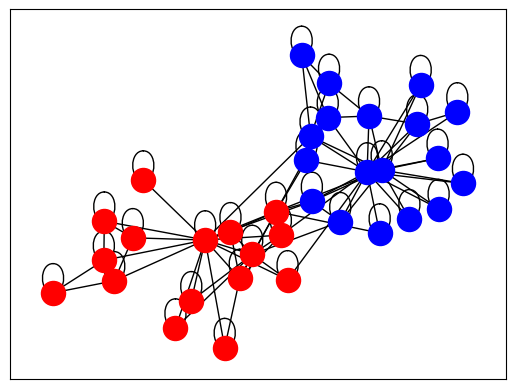

In [60]:
pos = nx.spring_layout(g, seed=123)
nx.draw_networkx_nodes(g, pos = pos, nodelist=reszero, node_color="blue")
nx.draw_networkx_nodes(g, pos = pos, nodelist=resone, node_color="red")
nx.draw_networkx_edges(g, pos = pos)

## Label propagation naive

In [61]:
from sklearn.semi_supervised import LabelPropagation

In [89]:
X = nx.adjacency_matrix(g)
X.todense()

array([[1, 4, 5, ..., 2, 0, 0],
       [4, 1, 6, ..., 0, 0, 0],
       [5, 6, 1, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 1, 4, 4],
       [0, 0, 2, ..., 4, 1, 5],
       [0, 0, 0, ..., 4, 5, 1]])

In [90]:
X.shape

(34, 34)

In [91]:
y = np.ones(34)
y = y*-1

In [92]:
y[0] = 1
y[33] = 2

In [97]:
lp = LabelPropagation(n_neighbors=1).fit(X,y)

In [98]:
lp.predict(X)

/home/gmas/miniconda3/envs/Gus_1/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.])

In [99]:
from karateclub import label_propagation

In [100]:
lp = label_propagation.LabelPropagation()

In [101]:
lp.fit(g)

In [104]:
lp.get_memberships()

{23: 8,
 33: 8,
 5: 10,
 7: 1,
 28: 31,
 4: 10,
 3: 1,
 31: 31,
 20: 8,
 19: 1,
 6: 10,
 32: 8,
 29: 8,
 9: 1,
 14: 8,
 2: 1,
 0: 1,
 17: 1,
 25: 31,
 22: 8,
 11: 1,
 13: 1,
 1: 1,
 24: 31,
 15: 8,
 18: 8,
 26: 8,
 27: 8,
 16: 10,
 12: 1,
 30: 8,
 21: 1,
 8: 8,
 10: 10}